In [1]:
from matplotlib import pyplot as plt

import complaint_functions as cf
import seaborn as sns
import pandas as pd
import eda

plt.style.use('seaborn')

In [2]:
complaints_df = pd.read_csv('../data/crime_reports/NYPD_Complaint_Map__Year_to_Date_.csv')

In [3]:
# CMPLNT_NUM	    Randomly generated persistent ID for each complaint 
# CMPLNT_FR_DT	    Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
# CMPLNT_FR_TM	    Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
# CMPLNT_TO_DT	    Ending date of occurrence for the reported event, if exact time of occurrence is unknown
# CMPLNT_TO_TM	    Ending time of occurrence for the reported event, if exact time of occurrence is unknown
# RPT_DT	        Date event was reported to police 
# KY_CD	            Three digit offense classification code
# OFNS_DESC	        Description of offense corresponding with key code
# PD_CD             Three digit internal classification code (more granular than Key Code)
# PD_DESC	        Description of internal classification corresponding with PD code (more granular than Offense Description)
# CRM_ATPT_CPTD_CD	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
# LAW_CAT_CD	    Level of offense: felony, misdemeanor, violation 
# JURIS_DESC	    Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.
# BORO_NM	The     name of the borough in which the incident occurred
# ADDR_PCT_CD	    the precinct in which the incident occurred
# LOC_OF_OCCUR_DESC	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
# PREM_TYP_DESC	    Specific description of premises; grocery store, residence, street, etc.
# PARKS_NM	        Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
# HADEVELOPT	    Name of NYCHA housing development of occurrence, if applicable
# X_COORD_CD	    X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
# Y_COORD_CD	    Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
# Latitude	        Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) 
# Longitude	        Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [4]:
cf.fix_borough_nulls(complaints_df, 'MANHATTAN', 40.7065, 40.8029, -74.0178, -73.9696)
cf.fix_borough_nulls(complaints_df, 'MANHATTAN', 40.7831, 40.8253, -73.9572, -73.9360)
cf.fix_borough_nulls(complaints_df, 'MANHATTAN', 40.8390, 40.8426, -73.9376, -73.9349)

Int64Index([41260, 140084, 346292], dtype='int64')

In [5]:
cf.swap_borough_values(complaints_df, 'MANHATTAN', 'QUEENS', 40.6611, 40.8117, -73.9267, -73.8327)

Int64Index([  8322,   8409,   8623,  11945,  22119,  22186,  28368,  28433,
             29150,  29167,  33040,  35771,  39557,  43702,  44460,  50111,
             53254,  54957,  59613,  63767,  70330,  71760,  75603,  83309,
             86571,  87598,  87801,  91208,  94553, 101187, 102353, 120517,
            125241, 130344, 133930, 141662, 146985, 150159, 150227, 151452,
            157126, 158007, 164441, 175111, 184047, 184183, 186213, 195849,
            195855, 200969, 211902, 237026, 237121, 247418, 266410, 268426,
            297241, 318340, 319703, 325735, 327029, 328369, 329392, 334637,
            337496, 338577, 339845, 341693, 345202, 349137, 353704, 357518,
            357695, 362988, 364601, 370229, 372274, 372869, 373491, 374153,
            375564, 376645, 378532, 381221, 392461, 394655, 397432, 399486,
            400939, 405592, 409188, 412520, 412765],
           dtype='int64')

In [6]:
complaints_df = complaints_df[complaints_df.BORO_NM == 'MANHATTAN'].reset_index(drop=True)

In [7]:
drop_columns = ['ADDR_PCT_CD', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'JURIS_DESC', 'KY_CD', 'PARKS_NM', 'PD_CD', 'RPT_DT', 'X_COORD_CD', 'Y_COORD_CD']
complaints_df.drop(drop_columns, axis=1, inplace=True)

In [8]:
complaints_df.fillna(value={'LOC_OF_OCCUR_DESC': 'N/A', 'PD_DESC': 'N/A', 'PREM_TYP_DESC': 'N/A'})
complaints_df.head()

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PD_DESC,PREM_TYP_DESC,Lat_Lon,Latitude,Longitude
0,921351410,MANHATTAN,11/04/2020,09:14:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.95153053599995 40.799466801000044),40.799467,-73.951531
1,482011867,MANHATTAN,09/21/2020,20:00:00,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.98147551499993 40.71148169600008),40.711482,-73.981476
2,428858939,MANHATTAN,08/19/2020,03:10:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.93823299699994 40.81756739000008),40.817567,-73.938233
3,825161475,MANHATTAN,07/13/2020,23:51:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.94617553799998 40.788845063000046),40.788845,-73.946176
4,880696630,MANHATTAN,07/13/2020,13:45:00,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.98514161199995 40.72178606000005),40.721786,-73.985142


In [9]:
bad_date = complaints_df[complaints_df.CMPLNT_FR_DT=='11/03/1010']
complaints_df.iloc[bad_date.index, [2]] = '11/03/2020'

bad_date = complaints_df[complaints_df.CMPLNT_FR_DT=='1920-04-29']
complaints_df.iloc[bad_date.index, [2]] = '04/29/2020'

In [10]:
# Create DateTime column
complaints_df['DATE_TIME'] = pd.to_datetime(complaints_df.CMPLNT_FR_DT + ' ' + complaints_df.CMPLNT_FR_TM, dayfirst=False, yearfirst=False)

In [11]:
# Keep only 2020 entries
complaints_df = complaints_df[complaints_df.DATE_TIME.dt.year == 2020]

In [12]:
# Create Weekday from newly create DateTime column
complaints_df['DoW'] = complaints_df['DATE_TIME'].dt.day_name()

In [13]:
# Create Time of Day
complaints_df['HOUR'] = complaints_df['DATE_TIME'].dt.hour

In [14]:
# Create Weekday from newly create DateTime column
complaints_df['MONTH'] = complaints_df['DATE_TIME'].dt.strftime('%b')

In [15]:
complaints_df.head(2)

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PD_DESC,PREM_TYP_DESC,Lat_Lon,Latitude,Longitude,DATE_TIME,DoW,HOUR,MONTH
0,921351410,MANHATTAN,11/04/2020,09:14:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.95153053599995 40.799466801000044),40.799467,-73.951531,2020-11-04 09:14:00,Wednesday,9,November
1,482011867,MANHATTAN,09/21/2020,20:00:00,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,POINT (-73.98147551499993 40.71148169600008),40.711482,-73.981476,2020-09-21 20:00:00,Monday,20,September


In [16]:
# categories = complaints_df.OFNS_DESC.value_counts()

In [17]:
# sub_categories = complaints_df.PD_DESC.value_counts()

In [18]:
# category_mask = ('PETIT LARCENY','HARRASSMENT 2CRIMINAL MISCHIEF & RELATED OF','ASSAULT 3 & RELATED OFFENSES','GRAND LARCENY','FELONY ASSAULT','OFF. AGNST PUB ORD SENSBLTY &,BURGLARY','ROBBERY','GRAND LARCENY OF MOTOR VEHICLE','OFFENSES AGAINST PUBLIC ADMINI','SEX CRIMES','THEFT-FRAUD','FRAUDS','RAPE','POSSESSION OF STOLEN PROPERTY','OFFENSES INVOLVING FRAUD','OFFENSES AGAINST THE PERSON','OTHER OFFENSES RELATED TO THEF','MURDER & NON-NEGL. MANSLAUGHTER','PROSTITUTION & RELATED OFFENSES','PETIT LARCENY OF MOTOR VEHICLE','KIDNAPPING & RELATED OFFENSES','FELONY SEX CRIMES','KIDNAPPING')

# complaints_df = complaints_df.loc[complaints_df['OFNS_DESC'].isin(category_mask)]

In [19]:
reorder = ['CMPLNT_NUM', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PD_DESC', 'PREM_TYP_DESC', 'Lat_Lon', 'Latitude', 'Longitude', 'DATE_TIME', 'DoW', 'HOUR', 'MONTH']
complaints_df = complaints_df[reorder]

In [20]:
category_dict = {
    'PETIT LARCENY' : 'Theft',
    'HARRASSMENT 2' : 'Harrastment',
    'GRAND LARCENY' : 'Theft',
    'CRIMINAL MISCHIEF & RELATED OF' : 'Conduct',
    'ASSAULT 3 & RELATED OFFENSES' : 'Assault',
    'BURGLARY' : 'Theft',
    'FELONY ASSAULT' : 'Assault',
    'OFF. AGNST PUB ORD SENSBLTY &' : 'Criminal',
    'ROBBERY' : 'Theft',
    'DANGEROUS DRUGS' : 'Contraband',
    'MISCELLANEOUS PENAL LAW' : 'Misc',
    'OFFENSES AGAINST PUBLIC ADMINI' : 'Misc',
    'GRAND LARCENY OF MOTOR VEHICLE' : 'Vehicular',
    'SEX CRIMES' : 'Sex Crimes',
    'VEHICLE AND TRAFFIC LAWS' : 'Vehicular',
    'DANGEROUS WEAPONS' : 'Contraband',
    'THEFT-FRAUD' : 'Theft',
    'CRIMINAL TRESPASS' : 'Criminal',
    'FRAUDS' : 'Fraud',
    'FORGERY' : 'Fraud',
    'POSSESSION OF STOLEN PROPERTY' : 'Contraband',
    'INTOXICATED & IMPAIRED DRIVING' : 'Vehicular',
    'RAPE' : 'Sex Crimes',
    'OFFENSES AGAINST THE PERSON' : 'Assault',
    'NYS LAWS-UNCLASSIFIED FELONY' : 'Misc',
    'OFFENSES INVOLVING FRAUD' : 'Fraud',
    'UNAUTHORIZED USE OF A VEHICLE' : 'Vehicular',
    'OTHER OFFENSES RELATED TO THEF' : 'Theft',
    'ARSON' : 'Criminal',
    'ADMINISTRATIVE CODE' : 'Misc',
    "BURGLAR'S TOOLS" : 'Contraband',
    'THEFT OF SERVICES' : 'Theft',
    'MURDER & NON-NEGL. MANSLAUGHTER' : 'Murder',
    'OTHER STATE LAWS (NON PENAL LA' : 'Misc',
    'FRAUDULENT ACCOSTING' : 'Fraud',
    'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' : 'Misc',
    'GAMBLING' : 'Misc',
    'PETIT LARCENY OF MOTOR VEHICLE' : 'Vehicular',
    'KIDNAPPING & RELATED OFFENSES' : 'Sex Crimes',
    'OFFENSES AGAINST PUBLIC SAFETY' : 'Conduct',
    'JOSTLING' : 'Assault',
    'DISORDERLY CONDUCT' : 'Conduct',
    'CHILD ABANDONMENT/NON SUPPORT' : 'Misc',
    "HOMICIDE-NEGLIGENT',UNCLASSIFIE" : 'Murder',
    'ANTICIPATORY OFFENSES' : 'Misc',
    'PROSTITUTION & RELATED OFFENSES' : 'Sex Crimes',
    'ESCAPE 3' : 'Misc',
    'FELONY SEX CRIMES' : 'Sex Crimes',
    'ALCOHOLIC BEVERAGE CONTROL LAW' : 'Misc',
    'NYS LAWS-UNCLASSIFIED VIOLATION' : 'Misc',
    'NEW YORK CITY HEALTH CODE' : 'Misc',
    'FORTUNE TELLING' : 'Misc',
    'OTHER STATE LAWS' : 'Misc'
}

In [21]:
complaints_df['CATEGORY'] = complaints_df['OFNS_DESC'].map(category_dict)

In [22]:
# monthly_totals = complaints_df.groupby(complaints_df.DATETIME.dt.month)['MONTH'].count().reset_index()
# monthly_totals = complaints_df.groupby('MONTH')['CATEGORY'].count().set_index('MONTH')
monthly_totals = complaints_df.groupby(['MONTH'])['CATEGORY'].count().reset_index()

In [23]:
# monthly_totals = monthly_totals.groupby(['CMPLNT_FR_DT'].)['CATEGORY'].count().reset_index()
monthly_totals.sort_values(by='CATEGORY')


,MONTH,CATEGORY
0,April,5167
8,May,6808
2,December,7197
6,June,7445
7,March,7664
9,November,7938
5,July,8039
1,August,8538
11,September,8698
3,February,8962


In [24]:
months_order = ['Jany', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

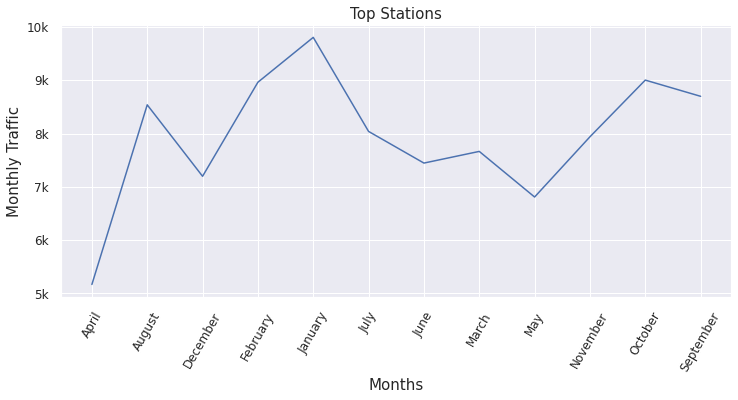

In [45]:
ax = sns.lineplot(x="MONTH", y='CATEGORY', data=monthly_totals)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title('Top Stations', fontsize=15)
ax.set_ylabel('Monthly Traffic', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
ax.set_yticks([5e3,6e3,7e3,8e3,9e3,10e3])
ax.set_yticklabels(['5k','6k','7k','8k','9k','10k'])
plt.xticks(rotation=60)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
# fig.savefig('Top_station2.pdf', bbox_inches='tight')
# fig.savefig('../viz/all_crime_monthly.svg', format='svg');

In [25]:
# complaints_df.dropna(subset=['CATEGORY'], inplace=True)

In [26]:
# complaints_df.to_excel('../data/exports/manhattan_crime.xlsx', sheet_name='Sheet_1', index=False)  